In [1]:
from src.functions import neighbor_graph
import networkx as nx

In [2]:
# Some parameter values previously found
lambdas = [
    #root of +(++-). The negative conjugate of the root of power series +(-+++--)which corresponds to angle 3/14
    -0.366875964264129394095471688839696517595563618765593247116005 + 0.520259438865200828930723528940227115174924275956965606630538*1j,
    #root of +--(+). It corresponds to angle 3/8
    0.595743941976559373530677134113758646737345510937144045504891 + 0.254425889416368995243211219643495532619603711040766445706284*1j,
    #root of +0+0--(++--). It does not have a corresponding angle
    0.05277415108645189611947896053229129518349675421389 + 0.68814740940655613016868820363694147172435466851358j,
    #root of +0(++--). The famous Kolakoski value. It does not have a corresponding angle. 
    0.102784715200295155851014308891911713188554459798849720235276 + 0.665456951152813476706190611629077711878015849981853233566949*1j,
    #root of +(0+0-). The attractor is a rectangle. It does not have a corresponding angle.
    0.0+0.5**(0.5)*1j
]

In [10]:
#Compute the neighbor graph forlambda root of power series +0(++--)
nbh_graph = neighbor_graph(lambdas[3],10) 

In [11]:
# If you want, print out the result 
import pprint as pp
pp.pprint(nbh_graph)

{'h+': {'h+-': 'pm', 'h+0': '*'},
 'h+0': {'h+0+': 'mp'},
 'h+0+': {'h+0++': '*'},
 'h+0++': {'h+0++-': 'pm'},
 'h+0++-': {'h+0': '*'},
 'id': {'h+': 'mp'}}


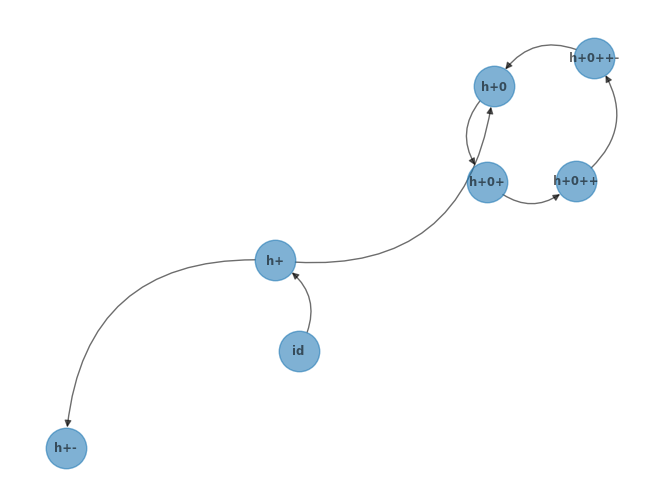

In [12]:
G =nx.MultiDiGraph(nbh_graph)

options = {
#     'width':1.0,
#     'node_color':'white',
#     'edge_color':'white',
    'alpha':0.572,
    'node_size':850,
    "connectionstyle":'arc3, rad=0.5',
    'with_labels':True, #node labels
    'font_size':'small',
    'font_color':'black',
    'font_weight':'bold'
}
# other graph layouts: planar_layout, spectral_layout, spring_layout
pos = nx.spring_layout(G)
nx.draw(G,pos,**options)

Note that it has one dead vertex(`h+-`), i.e. the out degree of the vertex is 0. 

Need to clean up recursively and then replot.

"has_dead_nbh=True ['h+-']"
'has_dead_nbh=False []'


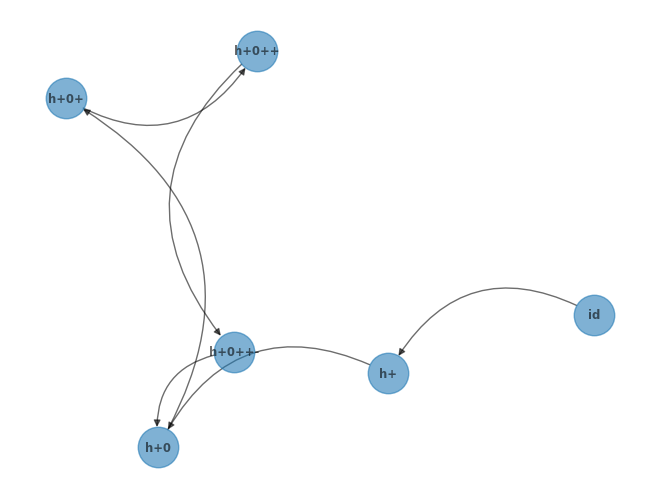

In [13]:
deadnodes = [node for node,degree in dict(G.out_degree()).items() if degree == 0] # gather all the deadnodes
has_dead_nbh = len(deadnodes)>0 # are there any?
pp.pprint(f"{has_dead_nbh=} {deadnodes}") 
while has_dead_nbh:
    G.remove_nodes_from(deadnodes) # remove the deadnodes
    deadnodes = [node for node,degree in dict(G.out_degree()).items() if degree == 0] # gather all the deadnodes
    has_dead_nbh = len(deadnodes)>0 # are there any?
    pp.pprint(f"{has_dead_nbh=} {deadnodes}")
    

pos = nx.spring_layout(G)
nx.draw(G,pos,**options)

List all self-loops.

In [14]:
list(nx.nodes_with_selfloops(G))

[]

Find a single cycle.

In [15]:
list(nx.find_cycle(G,"id"))

[('h+0', 'h+0+', 'mp'),
 ('h+0+', 'h+0++', '*'),
 ('h+0++', 'h+0++-', 'pm'),
 ('h+0++-', 'h+0', '*')]

Find all cycles.(simple means it is a closed path where no vertex appears twice)

In [16]:
list(nx.simple_cycles(G))

[['h+0+', 'h+0++', 'h+0++-', 'h+0']]